In [1]:
!pip install pytorch

  Using cached pytorch-1.0.2.tar.gz (689 bytes)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pytorch
Failed to build pytorch


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [6 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\User\AppData\Local\Temp\pip-install-8afighi6\pytorch_4a4d2f1a85714c0b919ae5c0b2ec8e0a\setup.py", line 15, in <module>
      raise Exception(message)
  Exception: You tried to install "pytorch". The package named for PyTorch is "torch"
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pytorch
ERROR: Could not build wheels for pytorch, which is required to install pyproject.toml-based projects


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
# import pytorch
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
all_year_files = os.listdir('data')[11:]

In [4]:
df = pd.read_csv(r'data/2010-11.csv')
for i in range(len(all_year_files)):
    df = pd.concat([df, pd.read_csv('data/' + all_year_files[i])])

In [ ]:
def calculate_draftkings_fantasy_points(row):
    fantasy_points = (
        row['PTS'] +
        row['3P'] * 0.5 +
        row['TRB'] * 1.25 +
        row['AST'] * 1.5 +
        row['STL'] * 2 +
        row['BLK'] * 2 -
        row['TOV'] * 0.5
    )
    cats_over_10 = int(row['PTS'] >= 10 + row['TRB'] >= 10 + row['AST'] >= 10 + row['STL'] >= 10 + row['BLK'] >= 10)
    if cats_over_10 >= 2:
        fantasy_points += 1.5
    if cats_over_10 >= 3:
        fantasy_points += 3
    return fantasy_points

df['DKFP'] = df.apply(calculate_draftkings_fantasy_points, axis=1)



In [12]:
# TODO: replace with real cost when downloaded

def randomly_assign_a_pricetag(row):
    random_number = np.random.uniform(0.7, 1.5)
    performance = row['MP'] + row['PTS'] + row['TRB']
    return random_number * performance

df['Cost'] = df.apply(randomly_assign_a_pricetag, axis=1)

<Axes: >

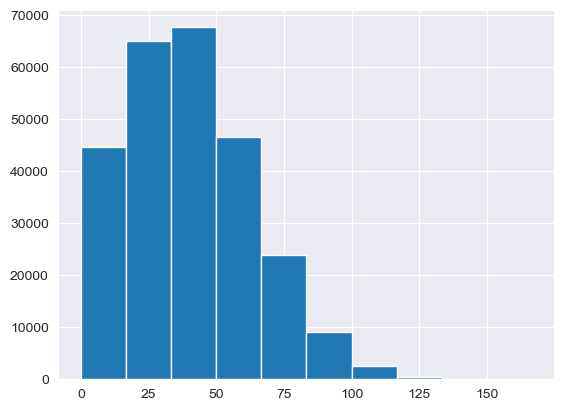

In [13]:
df['Cost'].hist()

<Axes: >

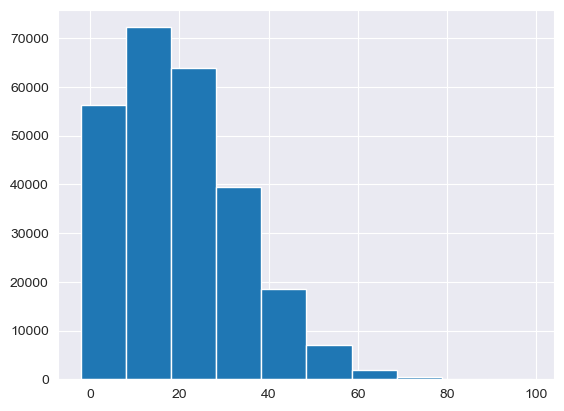

In [6]:
df['DKFP'].hist()

In [14]:
df.head()

,Player,Date,Team,Against,Home,MP,FG,FGA,FG%,3P,...,AST,STL,BLK,TOV,PF,PTS,+/-,GameLink,DKFP,Cost
0,LeBron James,2010-10-26,Miami Heat,Boston Celtics,0,42.39,10.0,21.0,0.476,3.0,...,3.0,1.0,2.0,8.0,1.0,31.0,1.0,https://www.basketball-reference.com/boxscores...,44.00,68.526427
1,Chris Bosh,2010-10-26,Miami Heat,Boston Celtics,0,37.37,3.0,11.0,0.273,0.0,...,2.0,1.0,1.0,1.0,4.0,8.0,-17.0,https://www.basketball-reference.com/boxscores...,24.50,66.322154
2,Dwyane Wade,2010-10-26,Miami Heat,Boston Celtics,0,36.41,4.0,16.0,0.250,1.0,...,6.0,3.0,0.0,6.0,4.0,13.0,-18.0,https://www.basketball-reference.com/boxscores...,30.50,54.032858
3,Joel Anthony,2010-10-26,Miami Heat,Boston Celtics,0,16.41,1.0,1.0,1.000,0.0,...,1.0,0.0,1.0,0.0,2.0,2.0,-12.0,https://www.basketball-reference.com/boxscores...,14.25,22.978265
4,Carlos Arroyo,2010-10-26,Miami Heat,Boston Celtics,0,12.33,1.0,3.0,0.333,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,-5.0,https://www.basketball-reference.com/boxscores...,3.00,14.446168


In [8]:
df.describe()

,Home,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+/-,DKFP
count,311900.000000,259912.000000,259912.000000,259912.000000,247182.000000,259912.000000,259912.000000,170414.000000,259912.000000,259912.000000,...,259912.000000,259912.000000,259912.000000,259912.000000,259912.000000,259912.000000,259912.000000,259912.000000,259865.000000,259912.000000
mean,0.516101,22.667014,3.632287,7.980078,0.441182,0.833309,2.338934,0.324738,1.658511,2.178737,...,3.086787,4.084132,2.126524,0.724399,0.462230,1.296477,1.925863,9.756394,-0.012853,20.193018
std,0.499741,10.743116,3.004790,5.598558,0.236165,1.253581,2.599006,0.305833,2.281250,2.788390,...,2.705104,3.493244,2.484035,0.973859,0.851776,1.393025,1.465705,7.999801,10.783506,13.789130
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-57.000000,-2.000000
25%,0.000000,15.050000,1.000000,4.000000,0.313000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,-7.000000,9.500000
50%,1.000000,23.360000,3.000000,7.000000,0.444000,0.000000,2.000000,0.333000,1.000000,2.000000,...,2.000000,3.000000,1.000000,0.000000,0.000000,1.000000,2.000000,8.000000,0.000000,18.250000
75%,1.000000,31.270000,5.000000,11.000000,0.571000,1.000000,4.000000,0.500000,2.000000,4.000000,...,4.000000,6.000000,3.000000,1.000000,1.000000,2.000000,3.000000,14.000000,7.000000,28.750000
max,1.000000,64.580000,24.000000,50.000000,1.000000,14.000000,24.000000,1.000000,26.000000,39.000000,...,23.000000,31.000000,25.000000,10.000000,12.000000,12.000000,6.000000,70.000000,57.000000,99.000000


In [19]:
df_no_mv = df.dropna()

In [28]:
df_no_mv.shape

(103054, 28)

In [29]:
df_no_mv.head()

,Player,Date,Team,Against,Home,MP,FG,FGA,FG%,3P,...,AST,STL,BLK,TOV,PF,PTS,+/-,GameLink,DKFP,Cost
0,LeBron James,2010-10-26,Miami Heat,Boston Celtics,0,42.39,10.0,21.0,0.476,3.0,...,3.0,1.0,2.0,8.0,1.0,31.0,1.0,https://www.basketball-reference.com/boxscores...,44.00,68.526427
2,Dwyane Wade,2010-10-26,Miami Heat,Boston Celtics,0,36.41,4.0,16.0,0.250,1.0,...,6.0,3.0,0.0,6.0,4.0,13.0,-18.0,https://www.basketball-reference.com/boxscores...,30.50,54.032858
13,Paul Pierce,2010-10-26,Boston Celtics,Miami Heat,1,40.33,4.0,7.0,0.571,3.0,...,3.0,1.0,0.0,3.0,3.0,19.0,12.0,https://www.basketball-reference.com/boxscores...,36.75,82.931343
14,Ray Allen,2010-10-26,Boston Celtics,Miami Heat,1,39.16,7.0,13.0,0.538,5.0,...,1.0,0.0,0.0,1.0,1.0,20.0,-2.0,https://www.basketball-reference.com/boxscores...,24.75,72.252729
24,Steve Nash,2010-10-26,Phoenix Suns,Portland Trail Blazers,0,35.25,10.0,19.0,0.526,2.0,...,6.0,1.0,0.0,9.0,1.0,26.0,-7.0,https://www.basketball-reference.com/boxscores...,37.25,81.580418


# Expected Value V1 - Linear Regression

In [20]:
# Define features (X) and target variable (y)
features = ["PTS", "3P", "TRB", "AST", "STL", "BLK", "TOV"]
X = df_no_mv[features]
y = df_no_mv["DKFP"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)


LinearRegression()

In [22]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2.9912918033185172e-27
R-squared: 1.0


# RL framework

In [23]:
!pip install stable-baselines3 gym pandas


In [24]:
import gym
from gym import spaces
import numpy as np


In [25]:
spaces.MultiDiscrete([len(df_no_mv)] * 5)

MultiDiscrete([103054 103054 103054 103054 103054])

In [45]:
class NBAFantasyEnv(gym.Env):
    def __init__(self, player_data, num_players_in_lineup, initial_budget):
        super(NBAFantasyEnv, self).__init__()

        self.player_data = player_data
        self.num_players_in_lineup = num_players_in_lineup
        self.initial_budget = initial_budget

        num_features = len(player_data.columns) - 2  # Exclude Player and DKFP columns
        self.feature_space = spaces.Box(low=0, high=np.inf, shape=(num_features,))

        # Other initialization code...

    def reset(self):
        # Initialize state based on player data, budget, etc.
        state = {
            "available_players": list(self.player_data["Player"]),
            "remaining_budget": self.initial_budget,
            "num_players_selected": 0,
            "lineup_features": np.zeros(self.feature_space.shape)
        }
        return state

    def step(self, action):
        # Execute action, update state, calculate reward, and check if episode is done
        # Update lineup_features based on the selected players' features
        state["lineup_features"] += self.player_data.loc[action, "PTS":"TOV"].values
        state["available_players"].remove(action)
        state["remaining_budget"] -= self.player_data.loc[action, "Player Cost"]
        state["num_players_selected"] += 1

        # Calculate DKFP (for illustrative purposes, use a random function here)
        dkfp = self.calculate_dkfp(state["lineup_features"])

        # Other logic for calculating reward, checking if episode is done, etc.
                # Calculate reward based on DKFP (higher DKFP, higher reward)
        reward = dkfp

        # Check if the episode (day) is done
        done = state["num_players_selected"] == self.num_players_in_lineup or state["remaining_budget"] <= 0

        # Construct the next state based on the current state
        next_state = {
            "available_players": state["available_players"],
            "remaining_budget": state["remaining_budget"],
            "num_players_selected": state["num_players_selected"],
            "lineup_features": state["lineup_features"]
        }

        return next_state, reward, done, {}

    @staticmethod
    def calculate_dkfp(df):
        ser = df.apply(calculate_draftkings_fantasy_points, axis=1)
        return np.sum(ser)

In [46]:
env = NBAFantasyEnv(df_no_mv, 5, 1000)

In [47]:
import numpy as np
import random

# Define your data (replace this with your actual data)
data = df_no_mv
# Define your Q-learning parameters
learning_rate = 0.1
discount_factor = 0.9
epsilon = 0.1

# Define your budget constraint
budget_limit = 120

# Define your Q-table
num_budget_bins = 10  # Number of budget bins for discretization
num_players_selected = 2  # Number of players to select
num_players_available = len(data)  # Number of players in your dataset

num_states = num_budget_bins * (num_players_selected + 1)
num_actions = num_players_available

q_table = np.zeros((num_states, num_actions))

In [48]:
q_table

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [49]:

# Discretize remaining budget
def discretize_remaining_budget(remaining_budget):
    budget_bins = [0, 20, 40, 60, 80, 100, 120]  # Define your budget bins
    for i in range(len(budget_bins) - 1):
        if remaining_budget >= budget_bins[i] and remaining_budget < budget_bins[i + 1]:
            return i
    return len(budget_bins) - 1  # If remaining_budget is greater than the last bin

# Training loop
num_episodes = 100
for episode in range(num_episodes):
    state = discretize_remaining_budget(budget_limit) * (num_players_selected + 1)
    state += 0  # Initialize the number of players selected to 0
    done = False

    while not done:
        # Choose action using epsilon-greedy exploration
        if np.random.uniform(0, 1) < epsilon:
            action = np.random.randint(num_actions)
        else:
            action = np.argmax(q_table[state, :])

        next_state, reward, done, _ = env.step(action)  # Implement your step function

        # Update Q-value using the Q-learning update rule
        q_value = q_table[state, action]
        max_next_q = np.max(q_table[next_state, :])
        new_q_value = q_value + learning_rate * (reward + discount_factor * max_next_q - q_value)
        q_table[state, action] = new_q_value

        state = next_state

TypeError: 'int' object is not subscriptable

In [ ]:
# After training, select the two best players under budget for a test episode
state = discretize_remaining_budget(budget_limit) * (num_players_selected + 1)
state += 0  # Initialize the number of players selected to 0
best_players = []
while len(best_players) < 2:
    action = np.argmax(q_table[state, :])
    best_players.append(action)
    state = state + 1

print("Best Players:", best_players)


In [39]:
def discretize_remaining_budget(remaining_budget):
    budget_bins = [0, 20, 40, 60, 80, 100, 120]  # Define your budget bins
    for i in range(len(budget_bins) - 1):
        if remaining_budget >= budget_bins[i] and remaining_budget < budget_bins[i + 1]:
            return i
    return len(budget_bins) - 1  # If remaining_budget is greater than the last bin

# Example usage
remaining_budget = 85
budget_bin = discretize_remaining_budget(remaining_budget)
print("Budget Bin:", budget_bin)


Budget Bin: 4


In [38]:
# Training loop
for episode in range(num_episodes):
    remaining_budget_bin = discretize_remaining_budget(state["remaining_budget"])
    num_players_selected = state["num_players_selected"]

    state = remaining_budget_bin * (num_players_selected + 1) + num_players_selected
    done = False

    while not done:
        # Choose action using epsilon-greedy exploration
        if np.random.uniform(0, 1) < epsilon:
            action = np.random.randint(num_actions)
        else:
            action = np.argmax(q_table[state, :])

        next_state, reward, done, _ = env.step(action)  # Implement your step function

        # Update Q-value using the Q-learning update rule
        q_value = q_table[state, action]
        max_next_q = np.max(q_table[next_state, :])
        new_q_value = q_value + learning_rate * (reward + discount_factor * max_next_q - q_value)
        q_table[state, action] = new_q_value

        state = next_state

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
# After training, select the two best players under budget for a test episode
state = ...  # Initialize the state for the test episode
best_players = []
while len(best_players) < 2:
    action = np.argmax(q_table[state, :])
    best_players.append(action)
    # state =   # Update the state for the next action

print("Best Players:", best_players)


What needs to be done:
1. run all of the data and just do a linear regression or a random forest or xgboost to get some value
2. write the RL part, that takes the value of all of the players and creates a strategy - does this replace the sorting algorirth?

then, iterate and change all of them - add more data, try different sorting alorithms, replace the linear regression with a neural network, etc.